# Car Price Prediction
Car Price Prediction is a really an interesting machine learning problem as there are many factors that influence the price of a car in the market. In this problem, we will be looking at a dataset based on sale/purchase of cars where our end goal will be to predict the price of the car given its features to maximize the profit.

Initially, we wants to know:
- Which variables are significant in predicting the price of a car.
- How well those variables describe the price of a car.


#### Importing Required Packages/Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

#Settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.2f}'.format

#### Naming Columns and Setting the Format of Data

In [2]:
# Provide the names for the columns since the CSV file with the data does not have a header row.
cols = ['symboling', 'losses', 'make', 'fuel_type', 'aspiration', 'num_doors',
        'body_style', 'drive_wheels', 'engine_location', 'wheel_base',
        'length', 'width', 'height', 'weight', 'engine_type', 'num_cylinders',
        'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
        'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

#### Loading the dataset
<p>We will be using an open source <a href="https://archive.ics.uci.edu/ml/datasets/automobile">Auto Mobile Dataset</a>. This data is from the various car companies. </p>

In [3]:
#importing dataset from the source
car_data = pd.read_csv('cars_data.csv',sep=',', names=cols, header=None, encoding='latin-1')

#### Displaying first 5 rows

In [4]:
#displaying firt 5 rows rows of dataset
car_data.head()

,symboling,losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450


#### Describing the shape of data

In [5]:
car_data.shape

(205, 26)

It consists of 206 rows and 26 attributes/features.

### Data Cleaning

#### Counting Missing values in each column

In [6]:
# Coerce all missing entries to NaN, and then replace those by the column mean.
car_data['price'] = pd.to_numeric(car_data['price'], errors='coerce')
car_data['horsepower'] = pd.to_numeric(car_data['horsepower'], errors='coerce')
car_data['peak_rpm'] = pd.to_numeric(car_data['peak_rpm'], errors='coerce')
car_data['city_mpg'] = pd.to_numeric(car_data['city_mpg'], errors='coerce')
car_data['highway_mpg'] = pd.to_numeric(car_data['highway_mpg'], errors='coerce')
car_data['losses'] = pd.to_numeric(car_data['losses'], errors='coerce')
car_data['symboling'] = pd.to_numeric(car_data['symboling'], errors='coerce')
car_data['wheel_base'] = pd.to_numeric(car_data['wheel_base'], errors='coerce')
car_data['bore'] = pd.to_numeric(car_data['bore'], errors='coerce')
car_data['stroke'] = pd.to_numeric(car_data['stroke'], errors='coerce')
car_data['compression_ratio'] = pd.to_numeric(car_data['compression_ratio'], errors='coerce')
car_data['city_mpg'] = pd.to_numeric(car_data['city_mpg'], errors='coerce')
car_data['highway_mpg'] = pd.to_numeric(car_data['highway_mpg'], errors='coerce')

In [7]:
car_data.isnull().sum()

symboling             0
losses               41
make                  0
fuel_type             0
aspiration            0
num_doors             0
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
weight                0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

It can be seen there are missing values in some of the columns. We will replace the missing values with the mean of each column.

#### Replacing missing values with the mean

In [8]:
car_data.fillna(car_data.mean(), inplace=True)

#### Checking Spelling Errors in Car Company name

In [9]:
#Finding if there is any mis-spelling of compny names
car_data.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Two cars are miss-spelled

In [10]:
#correcting names
car_data['make'].replace('alfa-romero', 'alfa-romeo', inplace=True)
car_data['make'].replace('peugot', 'peugeot', inplace=True)

In [11]:
#corrected names
car_data.make.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

### Data Exploration/ Understanding the data
In this section we will be trying to understand the dataset.We visualize the data columns and We will be finding the corelation amoung different features of teh dataset. Specifically we are seraching for the attribute that have a significant impact upon the car prices.

#### Data Types of each Column

In [12]:
car_data.dtypes

symboling              int64
losses               float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
weight                 int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

#### Describing Statistics of numerical columns

In [13]:
car_data.describe()

,symboling,losses,wheel_base,length,width,height,weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,122.00,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.26,5125.37,25.22,30.75,13207.13
std,1.25,31.68,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.52,476.98,6.54,6.89,7868.77
min,-2.00,65.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,0.00,101.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,1.00,122.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10595.00
75%,2.00,137.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16500.00
max,3.00,256.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


#### Describing Statistics of categorical columns

In [14]:
car_data.describe(include=[object])

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,3,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


#### Symboling 
symboling: -2 (least risky) to +3 most risky

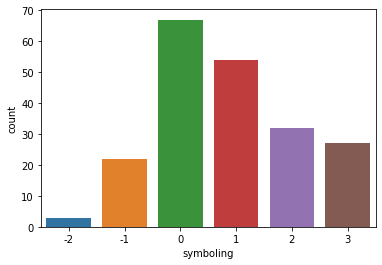

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='symboling', data=car_data);

#### Car Make

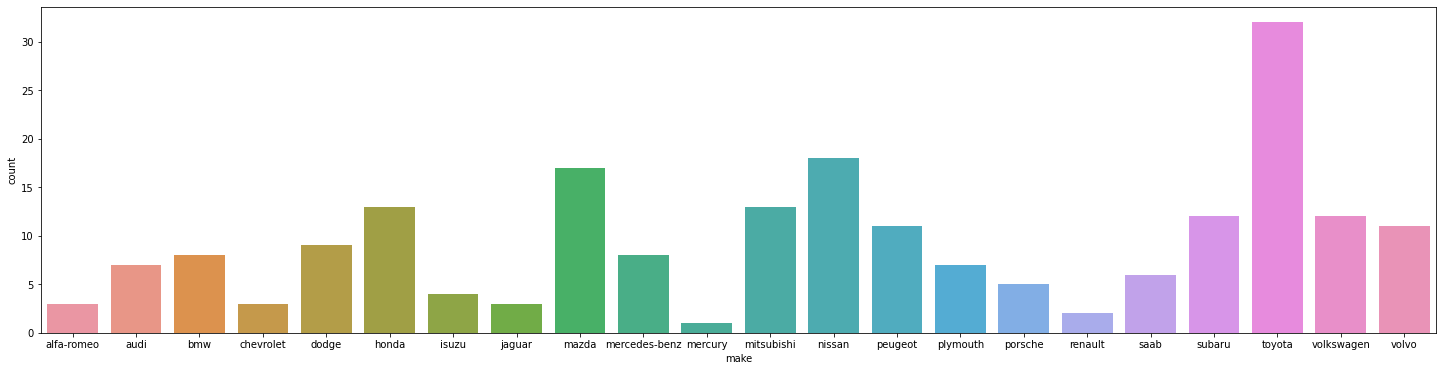

In [16]:
plt.figure(figsize=(25,6))
sns.countplot(x='make', data=car_data);

#### fuel_type

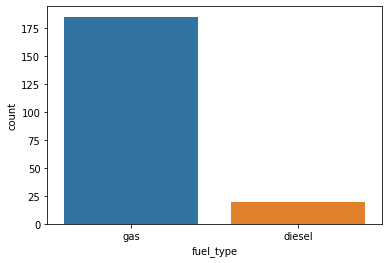

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='fuel_type', data=car_data);

#### Aspiration

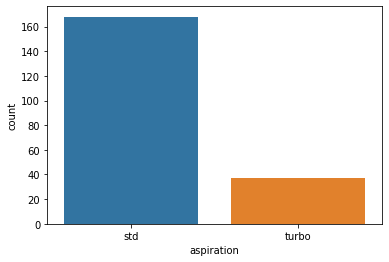

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='aspiration', data=car_data);

#### num_doors

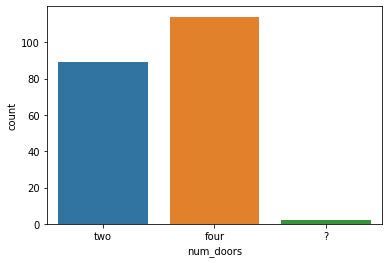

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x='num_doors', data=car_data);

#### body_style

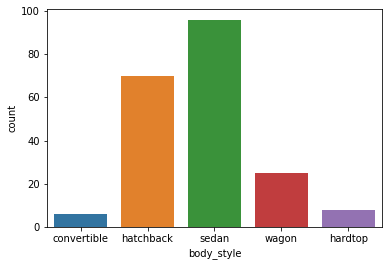

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='body_style', data=car_data);

#### drive_wheels

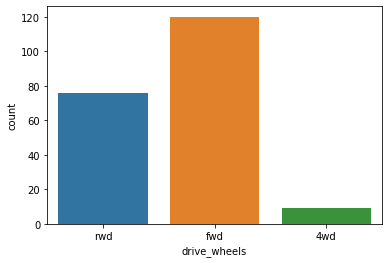

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='drive_wheels', data=car_data);

#### engine_location

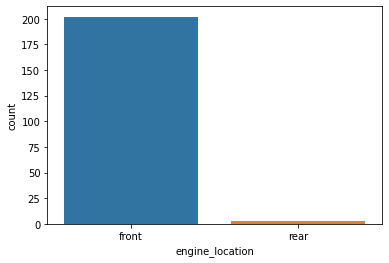

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='engine_location', data=car_data);

#### engine_type

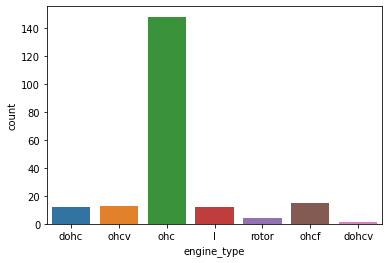

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='engine_type', data=car_data);

#### num_cylinders

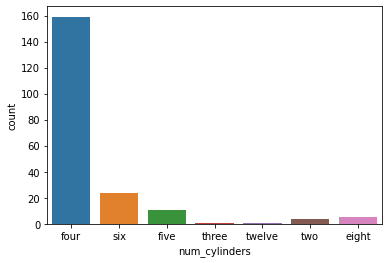

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='num_cylinders', data=car_data);

#### fuel_system

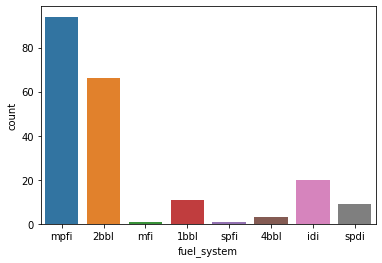

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='fuel_system', data=car_data);

#### losses

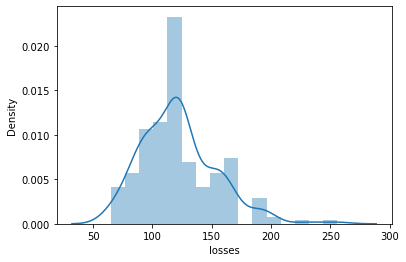

In [26]:
sns.distplot(car_data['losses'])
plt.show()

##### wheel_base

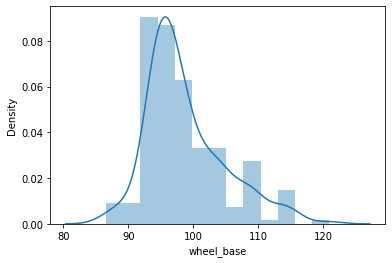

In [27]:
sns.distplot(car_data['wheel_base'])
plt.show()

#### length

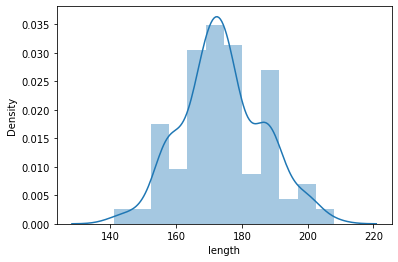

In [28]:
sns.distplot(car_data['length'])
plt.show()

#### width

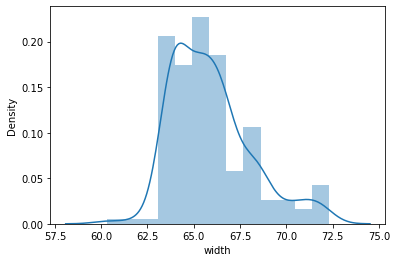

In [29]:
sns.distplot(car_data['width'])
plt.show()

#### height

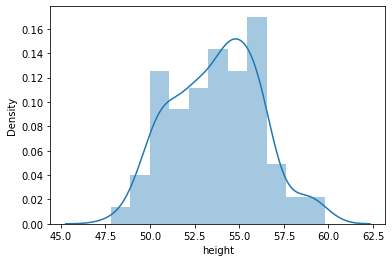

In [30]:
sns.distplot(car_data['height'])
plt.show()

#### weight

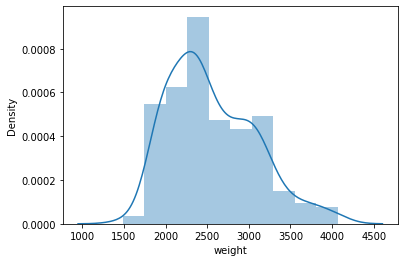

In [31]:
sns.distplot(car_data['weight'])
plt.show()

#### engine_size

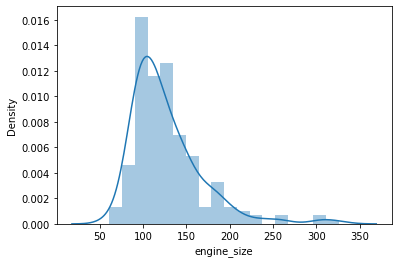

In [32]:
sns.distplot(car_data['engine_size'])
plt.show()

#### bore

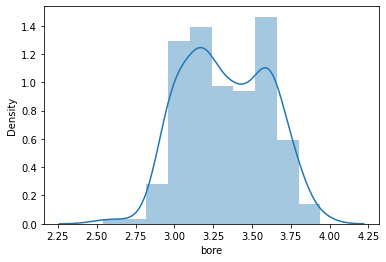

In [33]:
sns.distplot(car_data['bore'])
plt.show()

#### stroke

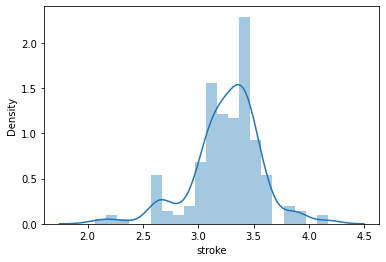

In [34]:
sns.distplot(car_data['stroke'])
plt.show()

#### compression_ratio

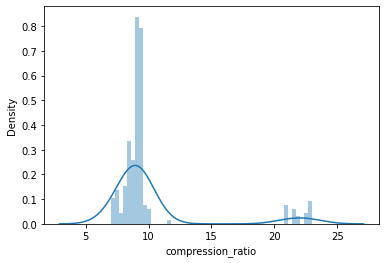

In [35]:
sns.distplot(car_data['compression_ratio'])
plt.show()

#### horsepower

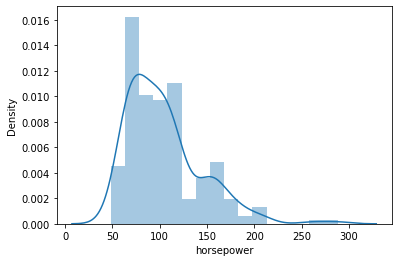

In [36]:
sns.distplot(car_data['horsepower'])
plt.show()

#### peak_rpm

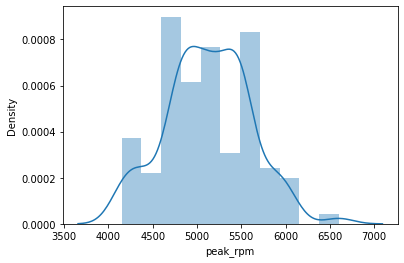

In [37]:
sns.distplot(car_data['peak_rpm'])
plt.show()

#### city_mpg

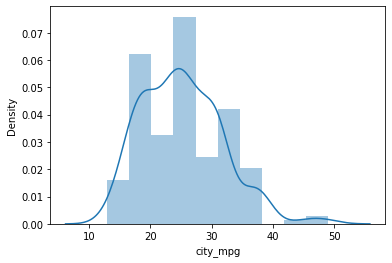

In [38]:
sns.distplot(car_data['city_mpg'])
plt.show()

#### highway_mpg

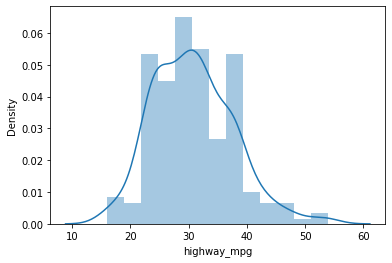

In [39]:
sns.distplot(car_data['highway_mpg'])
plt.show()

#### price

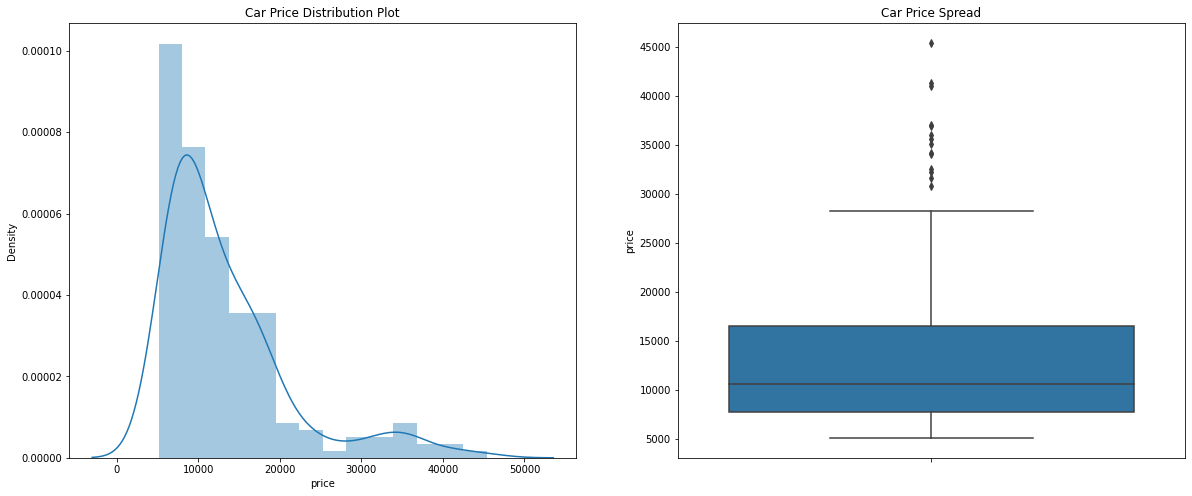

In [40]:
#Visualizing the spread of car prices
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(car_data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=car_data.price)

plt.show()

<h4>Plotting Pairwise Scatter Plot</h4>
<p>Let's now make a pairwise scatter plot and observe linear relationships.</p>

<Figure size 1440x720 with 0 Axes>

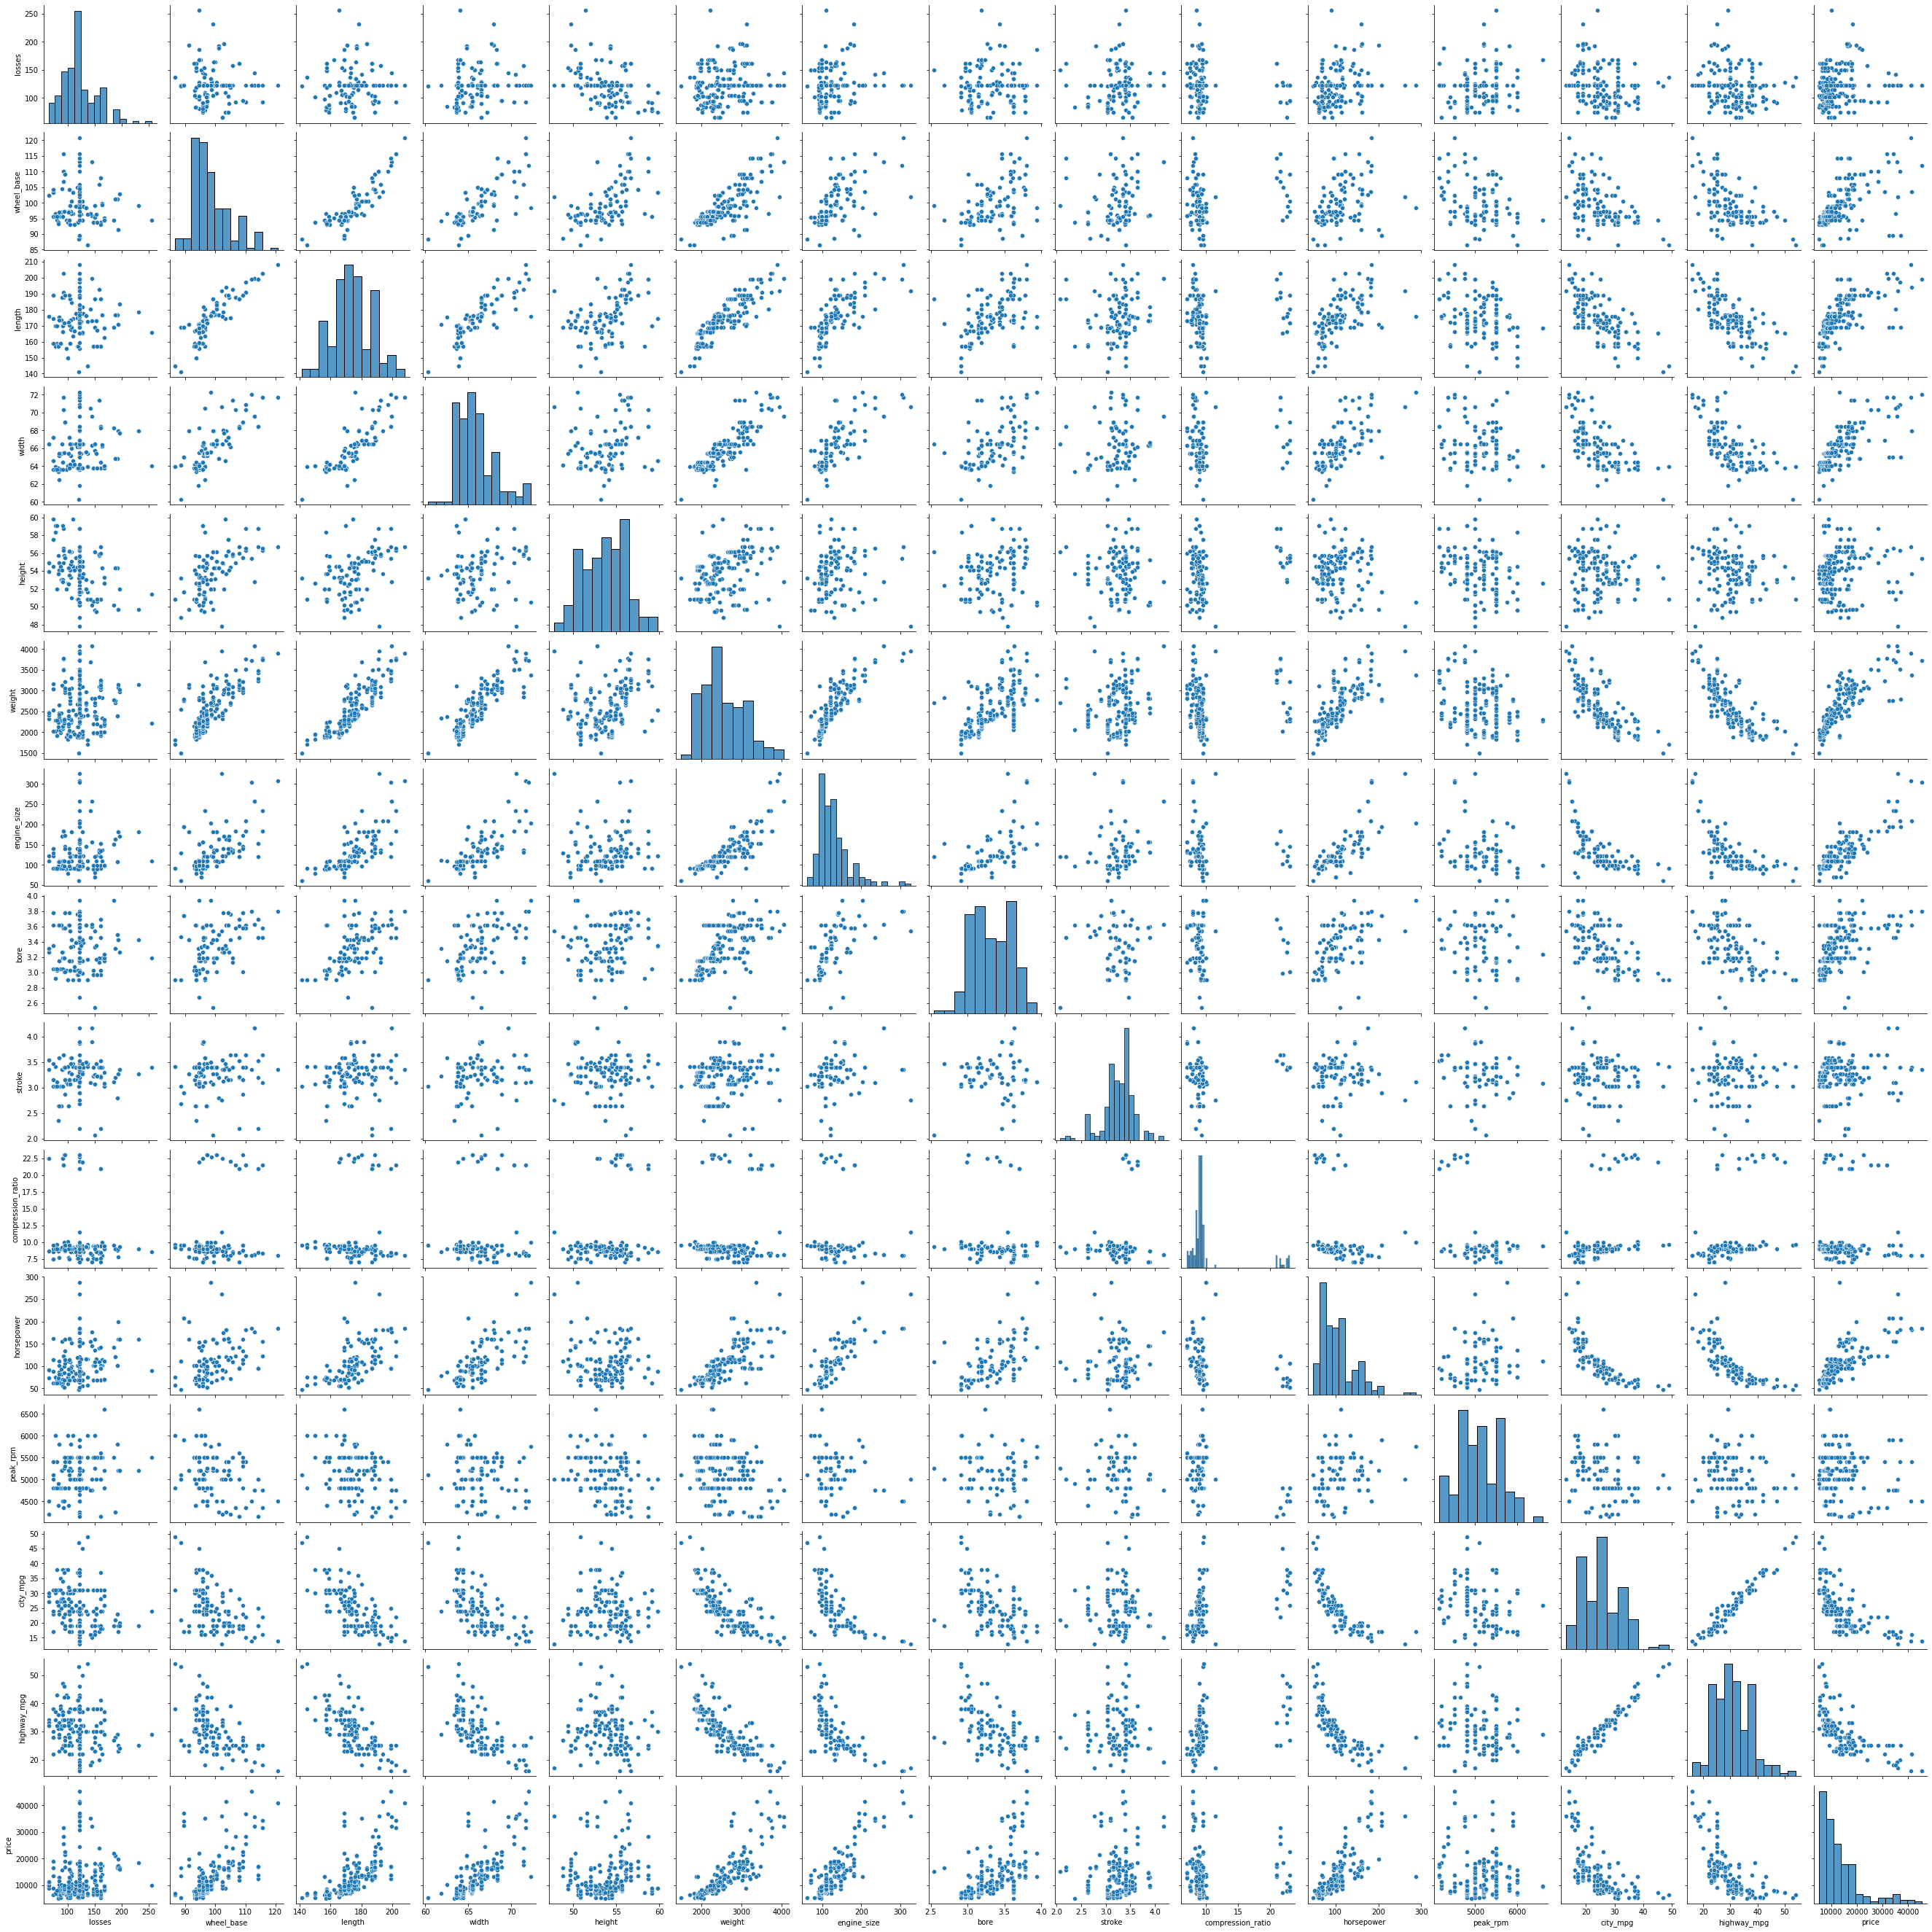

In [41]:
# paiwise scatter plot
#takes 5 mins to load

cars_numeric = car_data.select_dtypes(include=['float64', 'int64'])
cars_numeric = cars_numeric.drop(['symboling'], axis=1)
plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)
plt.show()

#### Correlation Matrix 

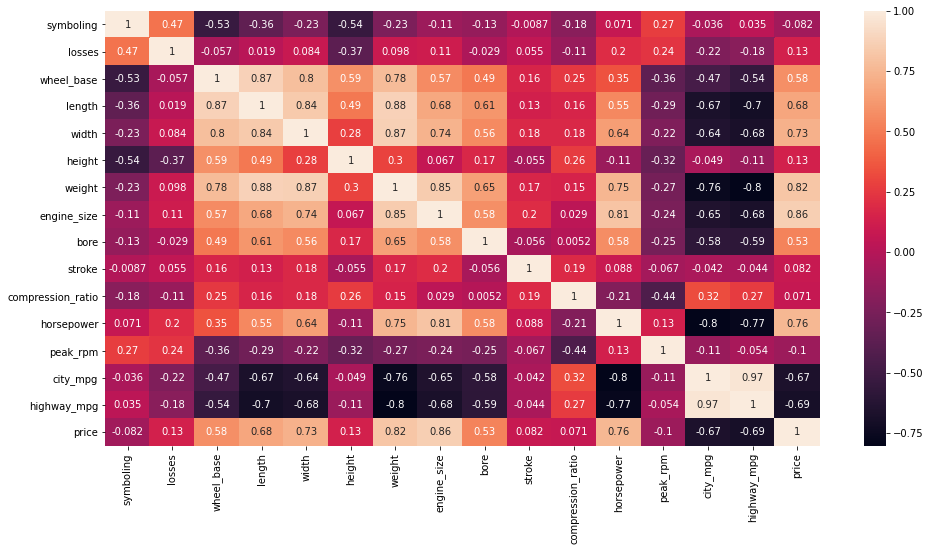

In [66]:
# plotting correlations on a heatmap
cor = car_data.corr()

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, annot=True)
plt.show()

<h4>Insights from Heatmap</h4>

<p>The heatmap shows some useful insights.<p>

<ul>
    <p><b>Correlation of price with independent variables:</b></p>
  <li>Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)</li>
  <li>Price is negatively correlated to citympg and highwaympg (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)
</li>
</ul>


<ul>
    <p><b>Correlation among independent variables:</b></p>
  <li>Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated</li>
  <li>Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).</li>
</ul>

### Data Preparation for Modelling

#### One-Hot encode

In [82]:
car_data_encoded=pd.get_dummies(car_data)
car_data_encoded.head()

,symboling,losses,wheel_base,length,width,height,weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,make_alfa-romeo,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugeot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_diesel,fuel_type_gas,aspiration_std,aspiration_turbo,num_doors_?,num_doors_four,num_doors_two,body_style_convertible,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd,engine_location_front,engine_location_rear,engine_type_dohc,engine_type_dohcv,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,num_cylinders_eight,num_cylinders_five,num_cylinders_four,num_cylinders_six,num_cylinders_three,num_cylinders_twelve,num_cylinders_two,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,122.00,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111.00,5000.00,21,27,13495.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,122.00,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111.00,5000.00,21,27,16500.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,122.00,94.50,171.20,65.50,52.40,2823,152,2.68,3.47,9.00,154.00,5000.00,19,26,16500.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,164.00,99.80,176.60,66.20,54.30,2337,109,3.19,3.40,10.00,102.00,5500.00,24,30,13950.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,2,164.00,99.40,176.60,66.40,54.30,2824,136,3.19,3.40,8.00,115.00,5500.00,18,22,17450.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Splitting dependent and Independent columns

In [83]:
y = car_data_encoded[['price']]
X = car_data_encoded.drop(['price'], axis = 1)

print(X.shape)
print(y.shape)

(205, 76)
(205, 1)


#### Train Test Split

<p>The <b>70%</b> of data from the dataset will be used for training the model while the remaining <b>30%</b> will be used for testing it.</p>

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=25,shuffle=True)

### Modelling

In [165]:
#importing models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#importing evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

#### Model 1: Linear Regression

In [166]:
#applying model on data
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [167]:
#evaluating model
train_pred = lreg.predict(X_train)
test_pred= lreg.predict(X_test)

r2_train_lr=r2_score(y_train,train_pred)
r2_test_lr=r2_score(y_test,test_pred)
mse_train_lr=sqrt(mean_squared_error(y_train,train_pred))
mse_test_lr=sqrt(mean_squared_error(y_test,test_pred))

print("R2 Training Score: ", r2_train_lr)
print("R2 Testing Score: ", r2_test_lr)
print("RMSE Training Score: ", mse_train_lr)
print("RMSE Testing Score: ", mse_test_lr)

R2 Training Score:  0.9596129471136563
R2 Testing Score:  0.8865439575809779
MSE Training Score:  1532.544654852509
MSE Testing Score:  2810.034060656575


#### Model 2: Polynomial Regression

##### Degree = 2

In [168]:
poly_reg = PolynomialFeatures(degree=2)
    
X_tr_poly = poly_reg.fit_transform(X_train)
X_tst_poly = poly_reg.fit_transform(X_test)
poly = LinearRegression()
poly.fit(X_tr_poly, y_train)
   
train_pred = poly.predict(X_tr_poly)
test_pred = poly.predict(X_tst_poly)

#evaluating model
r2_train_pl2=r2_score(y_train,train_pred)
r2_test_pl2=r2_score(y_test,test_pred)
mse_train_pl2=sqrt(mean_squared_error(y_train,train_pred))
mse_test_pl2=sqrt(mean_squared_error(y_test,test_pred))

print("R2 Training Score: ", r2_train_pl2)
print("R2 Testing Score: ", r2_test_pl2)
print("RMSE Training Score: ", mse_train_pl2)
print("RMSE Testing Score: ", mse_test_pl2)

R2 Training Score:  0.9992242450350964
R2 Testing Score:  -975.7059512890166
MSE Training Score:  212.39991473558234
MSE Testing Score:  260723.20481374155


##### Degree = 3

In [169]:
poly_reg = PolynomialFeatures(degree=3)
    
X_tr_poly = poly_reg.fit_transform(X_train)
X_tst_poly = poly_reg.fit_transform(X_test)
poly = LinearRegression()
poly.fit(X_tr_poly, y_train)
   
train_pred = poly.predict(X_tr_poly)
test_pred = poly.predict(X_tst_poly)

#evaluating models
r2_train_pl3=r2_score(y_train,train_pred)
r2_test_pl3=r2_score(y_test,test_pred)
mse_train_pl3=sqrt(mean_squared_error(y_train,train_pred))
mse_test_pl3=sqrt(mean_squared_error(y_test,test_pred))

print("R2 Training Score: ", r2_train_pl3)
print("R2 Testing Score: ", r2_test_pl3)
print("RMSE Training Score: ", mse_train_pl3)
print("RMSE Testing Score: ", mse_test_pl3)

R2 Training Score:  0.999224245035145
R2 Testing Score:  -393.3159006047544
MSE Training Score:  212.39991472893462
MSE Testing Score:  165660.86089039655


Polynomial Regression is not giving good results and it is overfitting alot. 

#### Model 3: Decision Tree Regressor

In [185]:
#applying model on data
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [186]:
#evaluating model
train_pred = dt_regressor.predict(X_train)
test_pred= dt_regressor.predict(X_test)

r2_train_dt=r2_score(y_train,train_pred)
r2_test_dt=r2_score(y_test,test_pred)
mse_train_dt=sqrt(mean_squared_error(y_train,train_pred))
mse_test_dt=sqrt(mean_squared_error(y_test,test_pred))

print("R2 Training Score: ", r2_train_dt)
print("R2 Testing Score: ", r2_test_dt)
print("RMSE Training Score: ", mse_train_dt)
print("RMSE Testing Score: ", mse_test_dt)

R2 Training Score:  0.9675638336408569
R2 Testing Score:  0.8899247988142187
MSE Training Score:  1373.4309052456986
MSE Testing Score:  2767.8497603686997


#### Model 4: Random Forrest Regressor

In [187]:
#applying model on data
rf_regressor = RandomForestRegressor(max_depth=5, random_state=0,n_estimators=100)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [188]:
#evaluating model
train_pred = rf_regressor.predict(X_train)
test_pred= rf_regressor.predict(X_test)

r2_train_rf=r2_score(y_train,train_pred)
r2_test_rf=r2_score(y_test,test_pred)
mse_train_rf=sqrt(mean_squared_error(y_train,train_pred))
mse_test_rf=sqrt(mean_squared_error(y_test,test_pred))

print("R2 Training Score: ", r2_train_rf)
print("R2 Testing Score: ", r2_test_rf)
print("RMSE Training Score: ", mse_train_rf)
print("RMSE Testing Score: ", mse_test_rf)

R2 Training Score:  0.9575321498309461
R2 Testing Score:  0.9093571142953474
MSE Training Score:  1571.5282573868335
MSE Testing Score:  2511.6818685037447


#### Comparing and Choosing best model

In [189]:
# write code here
M_dict = { "model-name": ['Linear Regression','Polynomial Regression (Degree=2)','Polynomial Regression (Degree=3)','Decision Tree Regressor','Random Forrest Regressor'],
          "R2 Score (Training)": [r2_train_lr, r2_train_pl2,   r2_train_pl3,  r2_train_dt,  r2_train_rf],  
          "R2 Score (Testing)": [r2_test_lr,   r2_test_pl2,    r2_test_pl3,   r2_test_dt,   r2_test_rf],
           "RMSE (Training)": [mse_train_lr,   mse_train_pl2,  mse_train_pl3, mse_train_dt, mse_train_rf],
           "RMSE (Testing)": [mse_test_lr,     mse_test_pl2,   mse_test_pl3,  mse_test_dt,  mse_test_rf],
                }

In [190]:
comparison=pd.DataFrame(M_dict)
comparison.sort_values(["R2 Score (Testing)",'RMSE (Testing)', 'R2 Score (Training)','RMSE (Training)'], ascending=False)

,model-name,R2 Score (Training),R2 Score (Testing),RMSE (Training),RMSE (Testing)
4,Random Forrest Regressor,0.96,0.91,1571.53,2511.68
3,Decision Tree Regressor,0.97,0.89,1373.43,2767.85
0,Linear Regression,0.96,0.89,1532.54,2810.03
2,Polynomial Regression (Degree=3),1.00,-393.32,212.40,165660.86
1,Polynomial Regression (Degree=2),1.00,-975.71,212.40,260723.20
